<a href="https://colab.research.google.com/github/seojeong-oh/mom-dad-lab/blob/main/linear%20regression%20tensorflow%20version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
#실습용 데이터 패키지 불러오기
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
import matplotlib.pyplot as plt
import numpy as np

### 데이터 불러오기

보스턴 주택 가격 데이터 속성

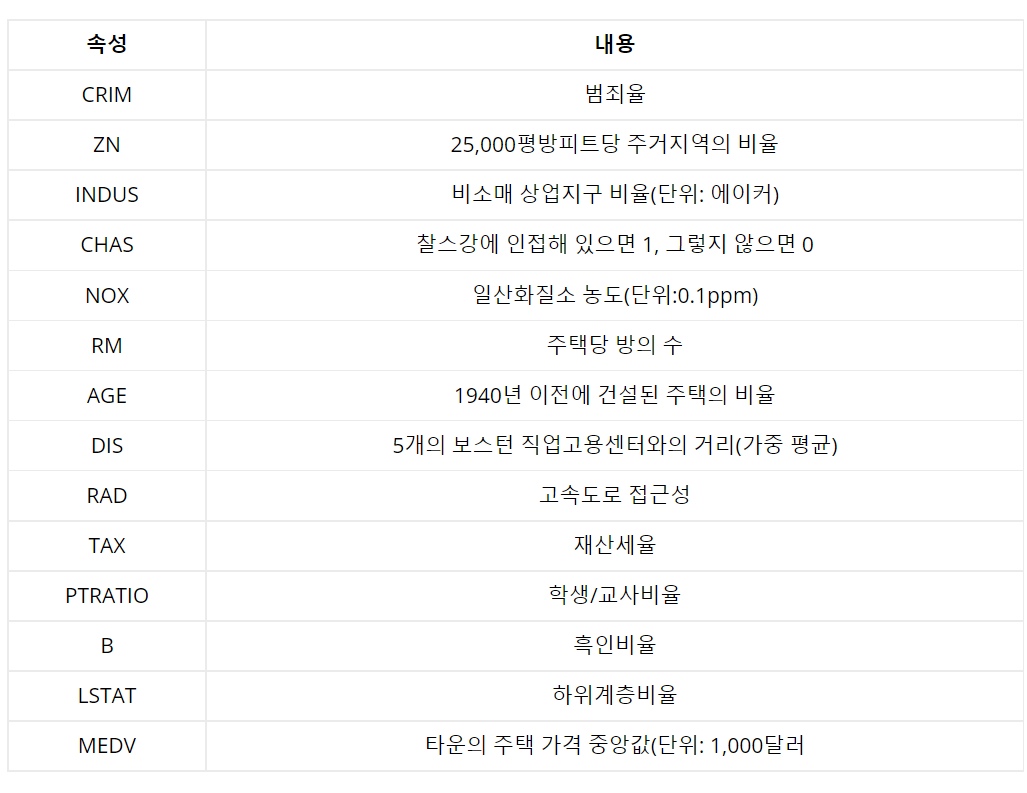

In [98]:
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

In [99]:
#Train 데이터의 X변수가 어떻게 생겼는지 확인
train_X[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [100]:
#Train 데이터의 y변수가 어떻게 생겼는지 확인
train_Y

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [101]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(404, 13)
(404,)
(102, 13)
(102,)


### 데이터 전처리(정규화)

선형회귀에서는 잔차가 정규분포를 향해야 한다.

why? 잔차가 정규분포를 향하지 않는다면, 선형회귀식이 균등하게 설명하지 못하기 때문이다.

출처 : https://mambo-coding-note.tistory.com/185

In [102]:
x_mean = train_X.mean(axis=0) # mean 행의 평균
x_std = train_X.std(axis=0) # std 표준편차
#( train_X - x_mean)/x_std = train_X
train_X -= x_mean # train_X = train_X - x_mean
train_X /= x_std #train_X = train_X / x_std

#( test_X - x_mean)/x_std = test_X
test_X -= x_mean #test_X = test_X - x_mean
test_X /= x_std #test_X = test_X / x_std

y_mean = train_Y.mean(axis=0) # mean 
y_std = train_Y.std(axis=0) #std

#( train_Y - x_mean)/x_std = train_Y
train_Y -= y_mean #train_Y = train_Y - y_mean
train_Y /= y_std #train_Y = train_Y - y_std

#( test_Y - x_mean)/x_std = test_Y
test_Y -= y_mean #test_Y = test_Y - y_mean
test_Y /= y_std #test_Y = test_Y / y_std

# 모델 학습(layer 4개)

**Dense에 들어가는 옵션**

units : 출력 값의 크기

activation : 활성화함수

In [103]:
#모델 정의
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=52, activation='relu', input_shape=(train_X.shape[1], )),  
  #첫 번째 레이어에서는 X 데이터의 속성을 모두 불러오기 위해 input_shape의 첫 번째 차원을 13으로 지정
  #마지막 레이어는 주택가격인 Y값 1개만 예측하면 되기 때문에 뉴런의 수가 1개
  #활성화 함수로 relu -> 양수면 자기 자신을 반환, 음수이면 0을 반환
  tf.keras.layers.Dense(units=39, activation='relu'), 
  tf.keras.layers.Dense(units=26, activation='relu'), 
  tf.keras.layers.Dense(units=1)
]) 
#훈련 데이터가 적을 때는 overfitting이 더 잘 발생하므로 작은 모델을 사용하여 overfitting을 피한다.
#layer을 4개로 한 이유 -> layer를 더 추가하면 overfitting이 발생할 가능성 있음

#compile 메소드를 통해서 학습 방식에 대한 환경설정
#mse를 최소로 만들어주는 가중치를 찾는것
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse',metrics=['mse']) #learning rate : 0.07, loss(손실함수) : mse
#optimizer : 최적화 알고리즘 
#adam : 현재로서 성능이 가장 좋음
#gd -> sgd -> rmsporo -> adam
# loss: 손실함수. 훈련셋과 연관. 훈련에 사용. 
# metric: 평가지표. 검증셋과 연관. 훈련 과정을 모니터링하는데 사용. 
# 손실함수로 MSE만 사용할 수 있는 것이 아니고, MAE(mean absolute error), hinge, categorical crossentropy, sparse categorical crossentropy, binary crossentropy 등도 사용할 수 있습니다
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 52)                728       
                                                                 
 dense_37 (Dense)            (None, 39)                2067      
                                                                 
 dense_38 (Dense)            (None, 26)                1040      
                                                                 
 dense_39 (Dense)            (None, 1)                 27        
                                                                 
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


dense 층의 출력을 보면 요소 수가 52인 벡터임을 알 수 있다.

출력된 내용 중 Param # 필드는 해당 층의 파라미터(가중치) 수를 의미



#### 회귀모델 학습

In [104]:
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.2)
#validation_split은 훈련데이터에서 일정 비율로 떼서 학습 결과를 검증하기 위한 것입니다. 
#출력의 경향을 보면, loss는 꾸준하게 감소하지만, val_loss는 loss보다 높은 값을 유지하는 것을 볼 수 있습니다.

Epoch 1/25
11/11 [==============================] - 1s 22ms/step - loss: 2.0845 - mse: 2.0845 - val_loss: 0.8297 - val_mse: 0.8297
Epoch 2/25
11/11 [==============================] - 0s 8ms/step - loss: 0.5153 - mse: 0.5153 - val_loss: 0.3184 - val_mse: 0.3184
Epoch 3/25
11/11 [==============================] - 0s 8ms/step - loss: 0.4004 - mse: 0.4004 - val_loss: 0.3775 - val_mse: 0.3775
Epoch 4/25
11/11 [==============================] - 0s 9ms/step - loss: 0.4881 - mse: 0.4881 - val_loss: 0.8376 - val_mse: 0.8376
Epoch 5/25
11/11 [==============================] - 0s 9ms/step - loss: 0.5360 - mse: 0.5360 - val_loss: 0.4964 - val_mse: 0.4964
Epoch 6/25
11/11 [==============================] - 0s 7ms/step - loss: 0.3134 - mse: 0.3134 - val_loss: 0.4791 - val_mse: 0.4791
Epoch 7/25
11/11 [==============================] - 0s 9ms/step - loss: 0.2479 - mse: 0.2479 - val_loss: 0.2859 - val_mse: 0.2859
Epoch 8/25
11/11 [==============================] - 0s 8ms/step - loss: 0.2140 - mse: 0.2

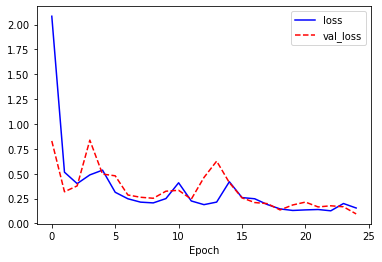

In [105]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### 회귀 모델 평가

In [106]:
loss, mse = model.evaluate(test_X, test_Y)
#evaluate 함수를 사용하면 모델의 최종적인 정답률과 loss 값을 알 수 있다.
print('loss : ', loss)
print('mse : ', mse)

4/4 [==============================] - 0s 4ms/step - loss: 0.2316 - mse: 0.2316
loss :  0.23162943124771118
mse :  0.23162943124771118


### 실제 주택 가격과 예측 주택 가격 시각화

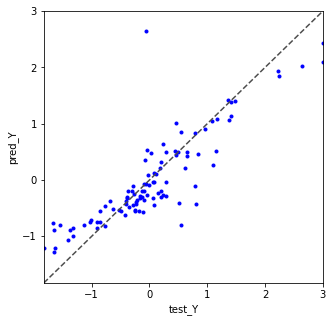

In [107]:
pred_Y = model.predict(test_X)

plt.figure(figsize=(5, 5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')
plt.show()

#모델 학습(layer가 3개)

In [108]:
#모델 정의
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=52, activation='relu', input_shape=(train_X.shape[1], )),  
  tf.keras.layers.Dense(units=26, activation='relu'), 
  tf.keras.layers.Dense(units=1)
]) 
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse',metrics=['mse']) 

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 52)                728       
                                                                 
 dense_41 (Dense)            (None, 26)                1378      
                                                                 
 dense_42 (Dense)            (None, 1)                 27        
                                                                 
Total params: 2,133
Trainable params: 2,133
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### 회귀모델 학습

In [109]:
history = model.fit(train_X, train_Y, epochs=20, batch_size=10, validation_split=0.2)# 통상적으로 0.2 사용
#validation_split은 훈련데이터에서 일정 비율로 떼서 학습 결과를 검증하기 위한 것입니다. 
#출력의 경향을 보면, loss는 꾸준하게 감소하지만, val_loss는 loss보다 높은 값을 유지하는 것을 볼 수 있습니다.

Epoch 1/20
33/33 [==============================] - 1s 11ms/step - loss: 1.5002 - mse: 1.5002 - val_loss: 0.4356 - val_mse: 0.4356
Epoch 2/20
33/33 [==============================] - 0s 5ms/step - loss: 0.3280 - mse: 0.3280 - val_loss: 0.2713 - val_mse: 0.2713
Epoch 3/20
33/33 [==============================] - 0s 5ms/step - loss: 0.2836 - mse: 0.2836 - val_loss: 0.3497 - val_mse: 0.3497
Epoch 4/20
33/33 [==============================] - 0s 5ms/step - loss: 0.2481 - mse: 0.2481 - val_loss: 0.3243 - val_mse: 0.3243
Epoch 5/20
33/33 [==============================] - 0s 5ms/step - loss: 0.2443 - mse: 0.2443 - val_loss: 0.3173 - val_mse: 0.3173
Epoch 6/20
33/33 [==============================] - 0s 5ms/step - loss: 0.3493 - mse: 0.3493 - val_loss: 0.4265 - val_mse: 0.4265
Epoch 7/20
33/33 [==============================] - 0s 5ms/step - loss: 0.3839 - mse: 0.3839 - val_loss: 0.5253 - val_mse: 0.5253
Epoch 8/20
33/33 [==============================] - 0s 5ms/step - loss: 0.2725 - mse: 0.2

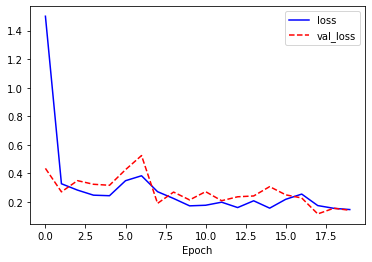

In [110]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### 회귀 모델 평가

In [111]:
loss, mse = model.evaluate(test_X, test_Y)
print('loss :', loss)
print('mse : ', mse)

4/4 [==============================] - 0s 5ms/step - loss: 0.2443 - mse: 0.2443
loss : 0.24433480203151703
mse :  0.24433480203151703


### 실제 주택 가격과 예측 주택 가격 시각화


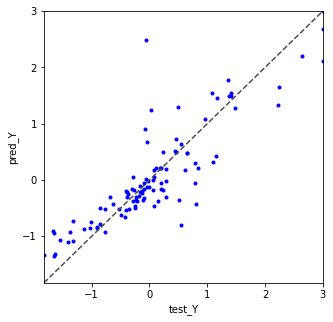

In [112]:
pred_Y_1 = model.predict(test_X)

plt.figure(figsize=(5, 5))
plt.plot(test_Y, pred_Y_1, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')
plt.show()

layer가 3개일 때가 4개 일 때보다 과소적합 or 과대적합 현상이 보임.

# MSE, RMSE, MAE, MAPE

**MSE : Mean Squared Error(평균 제곱 오차) -> 0에 가까울수록 좋은 모델**

In [113]:
#print(mean_squared_error(y_test, y_test_pred))
tf.keras.losses.MSE(test_Y, pred_Y)
mse=tf.keras.losses.MeanSquaredError()
mse(test_Y, pred_Y).numpy()

1.731397

**RMSE : Root Mean Squared Error(제곱근 평균 제곱 오차)** -> 0에 가까울수록 좋은 모델

In [114]:
tf.keras.losses.MSE(test_Y, pred_Y)
mse=tf.keras.losses.MeanSquaredError()
np.sqrt(mse(test_Y, pred_Y).numpy())

1.3158256

**MAE : Mean Absolute Error(평균 절대 오차)**-> 0에 가까울수록 좋은 모델

In [115]:
mae = tf.keras.losses.MeanAbsoluteError()
mae(test_Y, pred_Y).numpy()

1.0021342

**MAPE : Mean Absolute Percentage Error(평균 절대 백분율 오차)**

In [116]:
mape = tf.keras.losses.MeanAbsolutePercentageError()
mape(test_Y, pred_Y).numpy()

1529.3754

# **Reference**

Dense에 들어가는 옵션 : https://han-py.tistory.com/207

딥러닝 네트워크 모델 : https://dschloe.github.io/python/tensorflow2.0/ch4_4_boston_housing_deeplearning/

relu 함수 : https://gooopy.tistory.com/55

evaluate 함수 : https://hyjykelly.tistory.com/19

mse, metrics : https://bskyvision.com/740

전반적인 코드 : https://dschloe.github.io/python/tensorflow2.0/ch4_4_boston_housing_deeplearning/#iv-%EB%94%A5%EB%9F%AC%EB%8B%9D-%EB%84%A4%ED%8A%B8%EC%9B%8C%ED%81%AC-%ED%95%99%EC%8A%B5